1 | Importing Required Libraries & Data Source

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


2 | Exploratory Data Analysis (EDA) and Basic preprocessing

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

2.1 | Fill Missing Values

In [5]:
data.bmi=data.bmi.fillna(data.bmi.mean())
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [6]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

2.2 | Dropping irrelevant features

In [7]:
data = data.drop('id', axis=1)

2.3 | Checking for Duplicates

In [8]:
data.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


2.4 | Categorical Encoding of Features

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
data['gender']= le.fit_transform(data['gender'])
data['gender'].unique()

data['ever_married']= le.fit_transform(data['ever_married'])
data['ever_married'].unique()

data['work_type']= le.fit_transform(data['work_type'])
data['work_type'].unique()

data['Residence_type']= le.fit_transform(data['Residence_type'])
data['Residence_type'].unique()

data['smoking_status']= le.fit_transform(data['smoking_status'])
data['smoking_status'].unique()

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [11]:
X=data.drop('stroke',axis=1)
y=data['stroke']

In [12]:
pd.DataFrame(X,columns=data.columns[:-1])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


2.5 | Train-test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

3 | Model Building

3.1 | Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=10)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_logreg))
print(accuracy_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[1455    2]
 [  75    1]]
0.9497716894977168
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.33      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



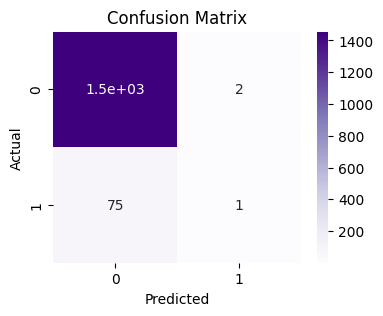

In [15]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.2 | KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=300, weights= 'distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[1457    0]
 [  76    0]]
0.9504240052185258
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



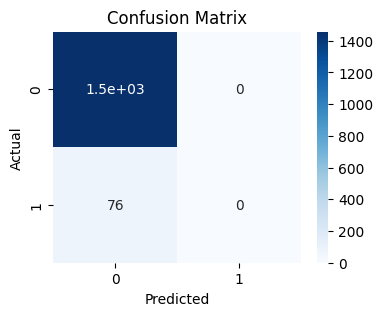

In [17]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.3 | SVM

In [18]:
from sklearn import svm
clf4 = svm.SVC(kernel='sigmoid', C=5)
clf4.fit(X_train, y_train)
y_pred_svm = clf4.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[1441   16]
 [  75    1]]
0.9406392694063926
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.06      0.01      0.02        76

    accuracy                           0.94      1533
   macro avg       0.50      0.50      0.50      1533
weighted avg       0.91      0.94      0.92      1533



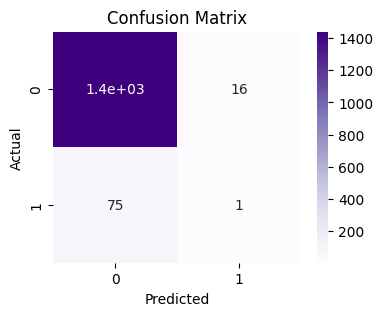

In [19]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.4 | Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[1402   55]
 [  61   15]]
0.9243313763861709
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1457
           1       0.21      0.20      0.21        76

    accuracy                           0.92      1533
   macro avg       0.59      0.58      0.58      1533
weighted avg       0.92      0.92      0.92      1533



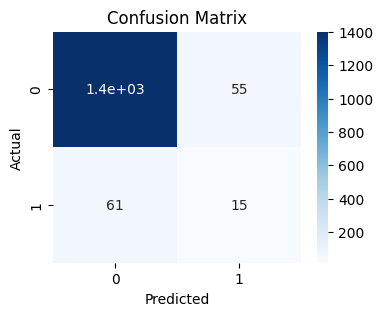

In [21]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.5 | Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=300, criterion="gini")
rf_classifier.fit(X_train,y_train)
y_pred_rf = rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[1456    1]
 [  76    0]]
0.9497716894977168
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



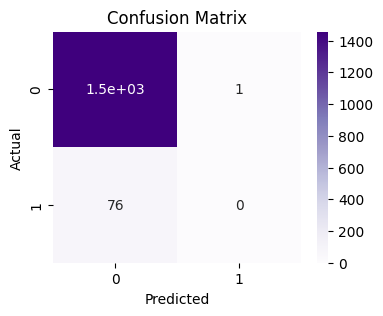

In [23]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.6 | Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
pred_y_nb = nb_classifier.predict(X_test)
print(confusion_matrix(y_test,pred_y_nb))
print(accuracy_score(y_test,pred_y_nb))
print(classification_report(y_test,pred_y_nb))

[[1314  143]
 [  44   32]]
0.878016960208741
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1457
           1       0.18      0.42      0.25        76

    accuracy                           0.88      1533
   macro avg       0.58      0.66      0.59      1533
weighted avg       0.93      0.88      0.90      1533



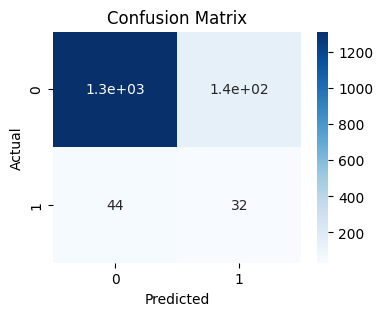

In [25]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, pred_y_nb), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4 | Boosting Algorithms

4.1 | Ada Boost Classifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_abc))
print(accuracy_score(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))

[[1456    1]
 [  76    0]]
0.9497716894977168
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



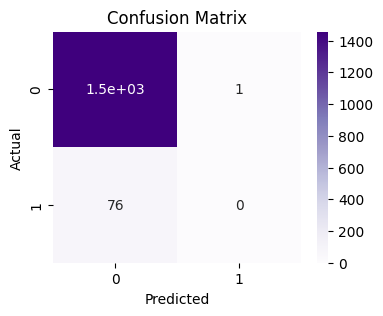

In [27]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_abc), annot=True, cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4.2 | Gradient Boosting Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.3)
gradient_booster.fit(X_train,y_train)
y_pred_gradboost=gradient_booster.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_gradboost))
print(accuracy_score(y_test,y_pred_gradboost))
print(classification_report(y_test,y_pred_gradboost))

[[1439   18]
 [  73    3]]
0.9406392694063926
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.14      0.04      0.06        76

    accuracy                           0.94      1533
   macro avg       0.55      0.51      0.52      1533
weighted avg       0.91      0.94      0.92      1533



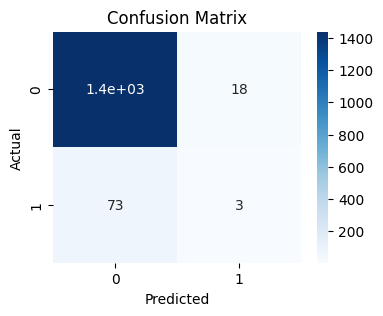

In [29]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_gradboost), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4.3 | XGB Classifier

In [30]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=1)
model.fit(X_train,y_train)
y_pred_xgb=model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[1436   21]
 [  71    5]]
0.9399869536855838
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.19      0.07      0.10        76

    accuracy                           0.94      1533
   macro avg       0.57      0.53      0.53      1533
weighted avg       0.92      0.94      0.93      1533



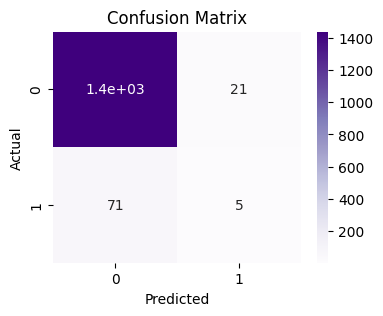

In [31]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5 | Manual Hyperparameter Tuning

In [32]:
model=RandomForestClassifier(n_estimators=500,criterion='gini',max_features='sqrt',min_samples_leaf=100,random_state=300).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[1457    0]
 [  76    0]]
0.9504240052185258
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



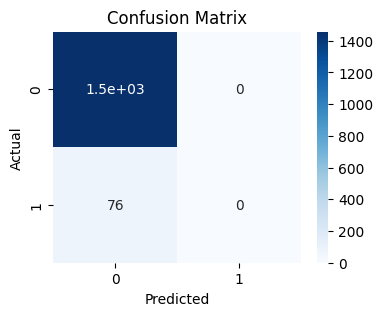

In [33]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

6 | Model Interpretations

6.1 | LIME

In [34]:
import lime
import lime.lime_tabular

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=300, criterion="gini")
rf_classifier.fit(X_train,y_train)
y_pred_rf = rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[1456    1]
 [  75    1]]
0.9504240052185258
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.50      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533



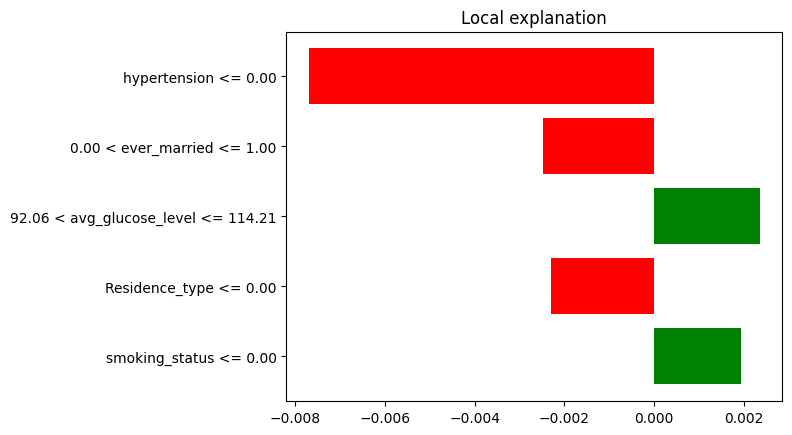

<Figure size 600x800 with 0 Axes>

In [36]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values,feature_names=X_train.columns.values.tolist(),class_names=['TYPE'],mode='regression')

exp = explainer.explain_instance(X_train.values[1000], rf_classifier.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt

plt.figure(figsize=(6,8))
plt.tight_layout()
plt.show()

In [37]:
exp.show_in_notebook(show_table=True)

6.2 | Shapash

In [38]:
model = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=12)
model=model.fit(X_train, y_train)
rf_y_pred = model.predict(X_test)
rf_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
fi=pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

,Feature,Importance
0,age,0.419816
1,avg_glucose_level,0.206161
2,bmi,0.118325
3,heart_disease,0.076822
4,work_type,0.054982
5,hypertension,0.037301
6,ever_married,0.028228
7,smoking_status,0.027209
8,gender,0.016942
9,Residence_type,0.014214


In [40]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer(model)
xpl.compile(x=X_test)
xpl.plot.features_importance()
#features_importance.plot(top_n_features=10)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x000001DEC13E52E0>


In [41]:
import random
subset = random.choices(X_test.index, k =50)
xpl.plot.features_importance(selection=subset)

In [42]:
xpl.plot.contribution_plot('avg_glucose_level')

In [43]:
xpl.plot.local_plot(index=random.choice(X_test.index))

In [44]:
fi=pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

,Feature,Importance
0,age,0.419816
1,avg_glucose_level,0.206161
2,bmi,0.118325
3,heart_disease,0.076822
4,work_type,0.054982
5,hypertension,0.037301
6,ever_married,0.028228
7,smoking_status,0.027209
8,gender,0.016942
9,Residence_type,0.014214
